In [9]:
## Import necessary libraries
import json
from typing import Dict
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [33]:
def average_conf_correct_answer(json_data: Dict) -> Dict:
    """Calcuate average correct answer confidence

    Args:
        json_data: JSON data that will be loaded from the result file

    Returns:
        Dict containing the average correct answer confidence for each time step.
    """
    time_step_data = {"step 0": [], "step 1": [], "step 2": []}
    for item in json_data:
        correct_answer = float(item["ground_truth_answers"].replace(",", ""))
        for i in range(3):
            ind = i
            if len(item["answer_distribution"]) <= i:
                ind = -1
            for answer in item["answer_distribution"][ind]:
                if correct_answer == float(answer[0].replace(",", "")):
                    time_step_data[f"step {i}"].append(answer[1])
                    break
            else:
                time_step_data[f"step {i}"].append(0)
    average_confidence = {}
    for step in time_step_data.keys():
        average_confidence[step] = sum(time_step_data[step])/ len(time_step_data[step])

    return average_confidence

def plot_average_correct_answer_conf(gpt_2_json_path: str, gemma2b_path: str, gemma7b_path: str):
    """Plot graph for the given models

    Args:
        gpt_2_json_path: GPT2 result output file path
        gemma2b_path: Gemma2b result output file path
        gemma7b_path: Gemma7b result output file path
    """
    recurring_gpt2_data = json.load(open(gpt_2_json_path, "r"))
    recurring_gemma2b_data = json.load(open(gemma2b_path, "r"))
    recurring_gemma7b_data = json.load(open(gemma7b_path, "r"))

    gpt2_avg = average_conf_correct_answer(recurring_gpt2_data)
    gemma2b_avg = average_conf_correct_answer(recurring_gemma2b_data)
    gemma7b_avg = average_conf_correct_answer(recurring_gemma7b_data)

    plt.plot([1,2,3,4,5], list(gpt2_avg.values()), label='gpt2', marker='o')
    plt.plot([1,2,3,4,5], list(gemma2b_avg.values()), label='gemma2b', marker='o')
    plt.plot([1,2,3,4,5], list(gemma7b_avg.values()), label='gemma7b', marker='o')

    plt.title('Average Confidence of Correct Answer vs. Time Steps')
    plt.xlabel('Step')
    plt.grid(True)
    plt.ylabel('Average Confidence of Correct Answer')

    plt.legend()
    plt.show()

In [22]:
plot_average_correct_answer_conf(gpt_2_json_path="recurring__gsm8k__gpt2-large__output.json",
                                 gemma2b_path="recurring__gsm8k__gemma-2b__output.json",
                                 gemma7b_path="recurring__gsm8k__gemma-7b__output.json")

FileNotFoundError: [Errno 2] No such file or directory: 'recurring__gsm8k__gpt2-large__output.json'

In [35]:
def plot_average_correct_answer_conf2(gpt_2_json_path: str, gemma2b_path: str, gemma7b_path: str):
    recurring_gpt2_data = json.load(open(gpt_2_json_path, "r"))
    recurring_gemma2b_data = json.load(open(gemma2b_path, "r"))
    recurring_gemma7b_data = json.load(open(gemma7b_path, "r"))

    gpt2_avg = average_conf_correct_answer(recurring_gpt2_data)
    gemma2b_avg = average_conf_correct_answer(recurring_gemma2b_data)
    gemma7b_avg = average_conf_correct_answer(recurring_gemma7b_data)
    
    plot_df = pd.DataFrame(columns=['Model', 'Time Step', 'Average Consistency of Correct Answer'])
    
    for step in gpt2_avg.keys():
        plot_df = pd.concat([plot_df, pd.DataFrame({'Model':'gpt2-large', 'Time Step':int(step.split(' ')[1])+1, 'Average Consistency of Correct Answer':[gpt2_avg[step]]})], ignore_index=True)
    for step in gemma2b_avg.keys():
        plot_df = pd.concat([plot_df, pd.DataFrame({'Model':'gemma-2b', 'Time Step':int(step.split(' ')[1])+1, 'Average Consistency of Correct Answer':[gemma2b_avg[step]]})], ignore_index=True)
    for step in gemma7b_avg.keys():
        plot_df =pd.concat([plot_df, pd.DataFrame({'Model':'gemma-7b', 'Time Step':int(step.split(' ')[1])+1, 'Average Consistency of Correct Answer':[gemma7b_avg[step]]})], ignore_index=True)
    
    g = sns.FacetGrid(plot_df, col="Model", sharey=False, height=4)#, hue="majority_threshold"
    g.map(sns.lineplot,'Time Step','Average Consistency of Correct Answer')
    g.add_legend()
    plt.plot()

C:\Users\AADAM\AppData\Local\Temp\ipykernel_54108\4283503825.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({'Model':'gpt2-large', 'Time Step':int(step.split(' ')[1])+1, 'Average Consistency of Correct Answer':[gpt2_avg[step]]})], ignore_index=True)


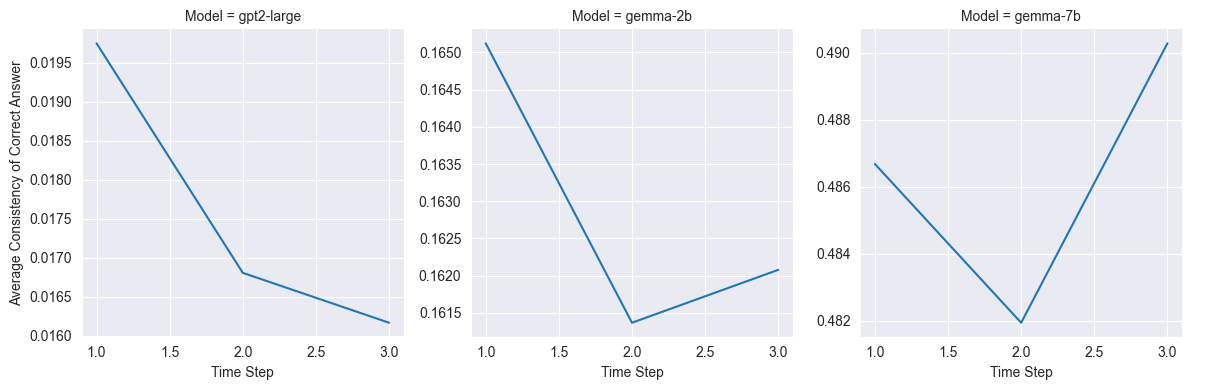

In [37]:
sns.set_style("darkgrid")
plot_average_correct_answer_conf2(gpt_2_json_path="../../results/recurring__gsm8k__gpt2-large__output.json",
                                 gemma2b_path="../../results/recurring__gsm8k__gemma-2b__output.json",
                                 gemma7b_path="../../results/recurring__gsm8k__gemma-7b__output.json")